# 4 - Deep neural network in TensorFlow 2.0





The MNIST data set is so well-known as the first introductory image classification problem that new learners take on that the TensorFlow 2.0 authors have taken a different approach for their first image classification model. This notebook will walk through creating a classification network in `keras`, which we'll then adapt probabilistically using TensorFlow Probability.

Source for the original classification model and this data set is available here: https://www.tensorflow.org/tutorials/keras/classification

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
tf.get_logger().setLevel('ERROR')

2.0.0


We've seen how to solve simple regression problems in TensorFlow 2.0 and the Keras layers library, but how about doing something deeper?

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

Let's explore these data

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [42]:
train_labels[0]

9

In [43]:
class_names[train_labels[0]]

'Ankle boot'

All of the image data we have is represented as a series of pixels, each with an integer r/g/b value of between 0 and 255 -- let's transform those such that they're usable by a neural network.

Take a look at the first image.

In [6]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

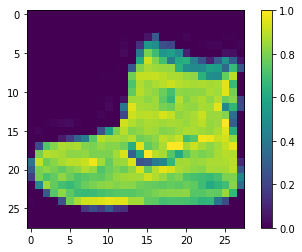

In [44]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Standardize the r/g/b pixel values to between zero and one.

In [45]:
train_images = train_images / 255.0  # Divide by a float to avoid integer floor division.

test_images = test_images / 255.0

Let's see what these look like!

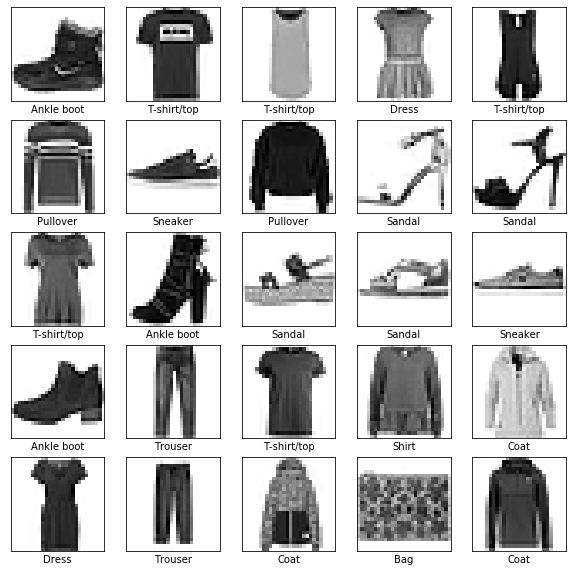

In [46]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Now that we've seen what these images look like and made them consumable by a TensorFlow 2.0 model, let's construct such a model and plug them in.

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

For a loss function, we'll choose sparse softmax cross entropy loss between logit outputs and labels -- this is a great loss function for mutually exclusive discrete classification tasks because it doesn't require you to one-hot encode your training labels. Next time, we'll show what that looks like for completion's sake.

In [49]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Just over 100,000 parameters! Let's see how long this takse to fit.

In [14]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.5007 - accuracy: 0.8235
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3768 - accuracy: 0.8637s - los
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3370 - accuracy: 0.8777
Epoch 4/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3123 - accuracy: 0.8850
Epoch 5/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2955 - accuracy: 0.8912s - loss: 0.2965 - accuracy
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2789 - accuracy: 0.8971
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2676 - accuracy: 0.9012s - ETA: 0s - los
Epoch 8/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2572 - accuracy: 0.9039
Epoch 9/10
60000/60000 [==============================] - 5s 81us/sam

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2284 - accuracy: 0.8844

Test accuracy: 0.8844


Our model trains fairly quickly, even without a GPU. Fortunately, it's small and fairly shallow as deep neural networks go. Let's take a look at the predictions.

In [16]:
predictions = model.predict(test_images)

In [22]:
predictions[0]

array([1.6363296e-07, 6.3557508e-08, 4.7090886e-08, 8.1424356e-10,
       1.1555294e-08, 4.5007866e-04, 3.9593814e-08, 5.8153262e-03,
       3.8186039e-07, 9.9373394e-01], dtype=float32)

Our softmax function effectively squished the model outputs into a distribution and seems to be most heavily activated on class 9. Let's verify that.

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

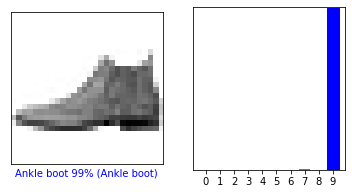

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Question: are the other outputs of the softmax function probabilities?

Let's now try to plot predictions from the test set generally and see how well we're doing.

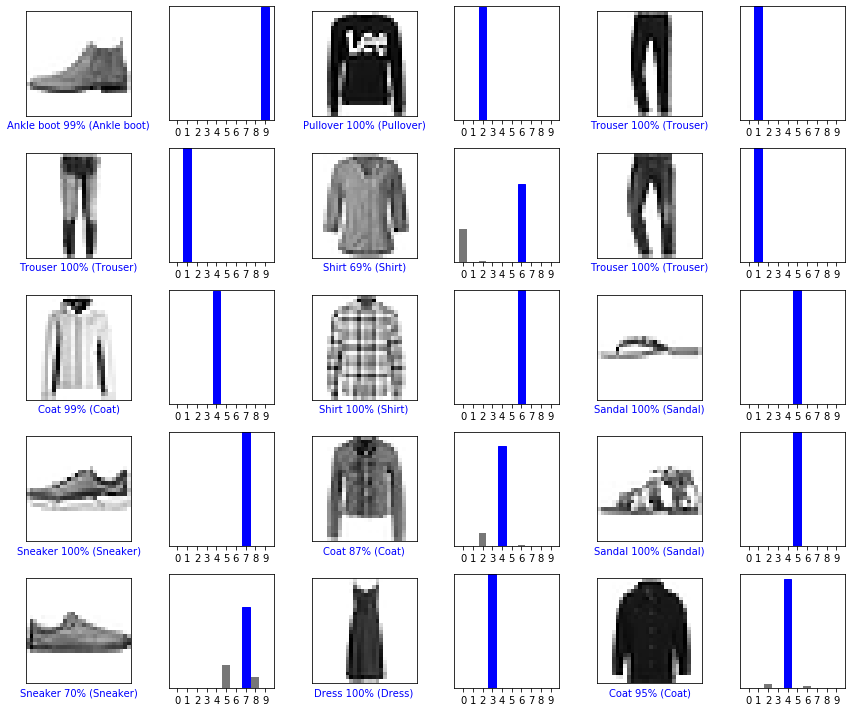

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## A second time around

That was so fast and easy, let's do it again.

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 116us/sample - loss: 1.0952 - accuracy: 0.6622
Epoch 2/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.6428 - accuracy: 0.7682
Epoch 3/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.5664 - accuracy: 0.7965
Epoch 4/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5246 - accuracy: 0.8141
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4963 - accuracy: 0.8249
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4755 - accuracy: 0.8330
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4604 - accuracy: 0.8384
Epoch 8/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4477 - accuracy: 0.8427s - loss:
Epoch 9/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.4370 - accuracy: 0.8457
Ep

In [52]:
test_loss2, test_acc2 = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy 1:', test_acc)
print('\nTest accuracy 2:', test_acc2)

10000/1 - 1s - loss: 0.3622 - accuracy: 0.8366

Test accuracy: 0.8366


In [53]:
predictions = model.predict(test_images)

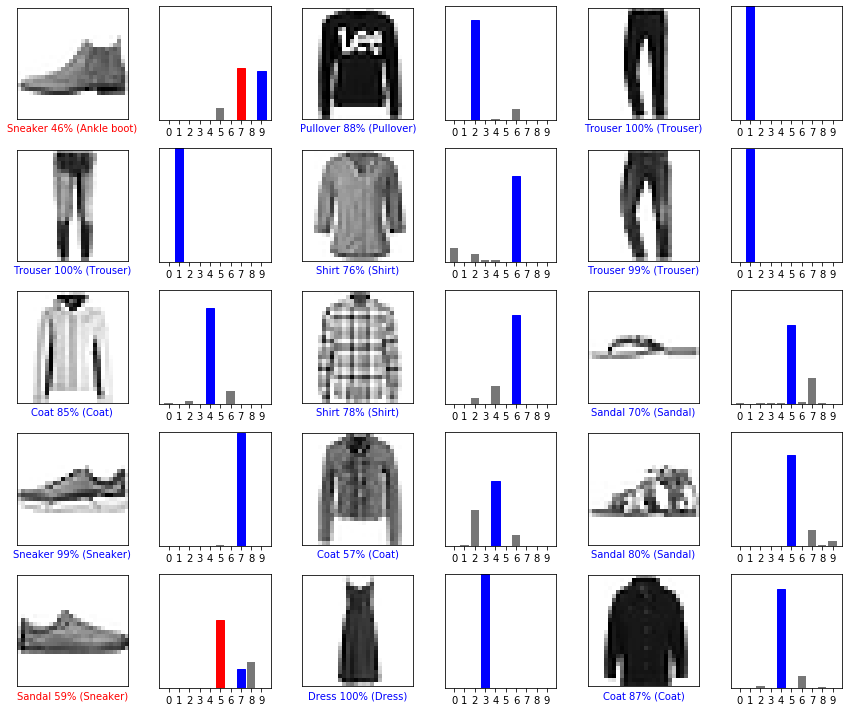

In [54]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Even when we train the same model the same way twice, we're still getting inconsistent results from the output. Clearly, there's some uncertainty that the model isn't making clear to us.

## Takeaways
- It's very easy and fast to train a TensorFlow `keras` model that discriminates between different sorts of clothing items.
- Even training the same model on the same data set twice in a row, we're still clearly subject to uncertainties and randomness that we can't observe directly in a single model instance.